In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv("../Project/data/athlete_events.csv").query("NOC == 'GBR'")
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
785,453,Leslie Ablett,M,24.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Water Polo,Water Polo Men's Water Polo,NaN
786,453,Leslie Ablett,M,32.0,NaN,NaN,Great Britain,GBR,1936 Summer,1936,Summer,Berlin,Water Polo,Water Polo Men's Water Polo,NaN
888,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Backstroke,NaN
889,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN
890,509,Gary Abraham,M,21.0,175.0,64.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Backstroke,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269996,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269998,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [4]:
blahej = "!"

In [5]:
file_path_athlete_events = "data/athlete_events.csv"
athlete_events_data = pd.read_csv(file_path_athlete_events)

gb_athletes = athlete_events_data[athlete_events_data['NOC'] == 'GBR']
gb_rowing = gb_athletes[gb_athletes['Sport'] == 'Rowing']
gb_cycling = gb_athletes[gb_athletes['Sport'] == 'Cycling']

medal_trend_rowing = gb_rowing.dropna(subset=['Medal']).groupby('Year')['Medal'].count()
medal_trend_cycling = gb_cycling.dropna(subset=['Medal']).groupby('Year')['Medal'].count()

print("Rowing")
display(medal_trend_rowing)
print("\nCycling")
display(medal_trend_cycling)

Rowing


Year
1900     1
1908    32
1912    24
1920    10
1924     5
1928    16
1932     6
1936     6
1948    13
1964     4
1976    11
1980    15
1984     5
1988     5
1992     5
1996     6
2000    17
2004    12
2008    23
2012    28
2016    26
Name: Medal, dtype: int64


Cycling


Year
1896     2
1900     1
1906     6
1908    14
1912    13
1920     9
1924     2
1928    11
1932     6
1936     4
1948    12
1952     4
1956     9
1972     4
1976     4
1992     1
1996     2
2000    10
2004    10
2008    19
2012    19
2016    20
Name: Medal, dtype: int64

In [6]:
medal_trend_relevant = pd.DataFrame({'Rowing': medal_trend_rowing, 'Cycling': medal_trend_cycling})


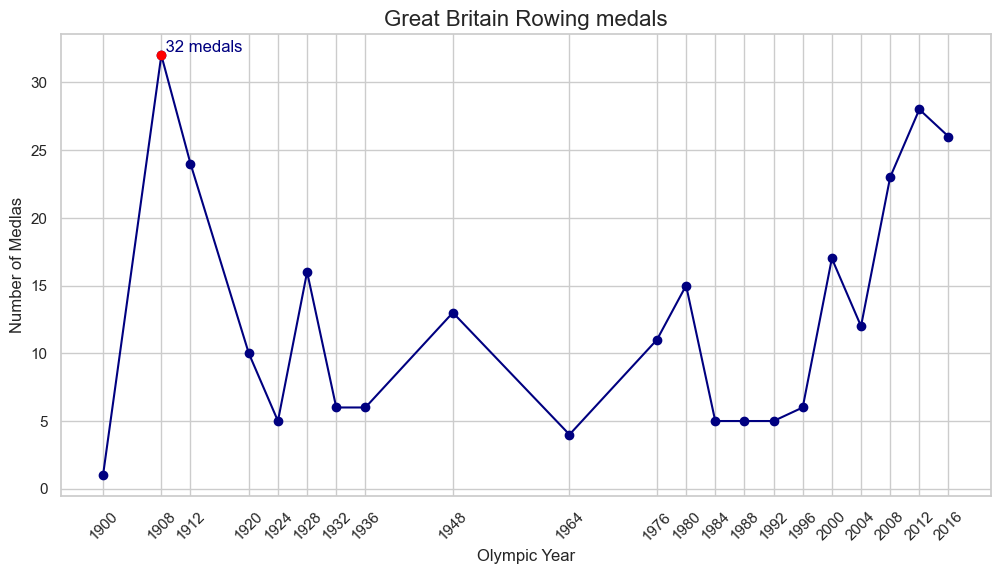

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=[12, 6])
plt.plot(medal_trend_rowing.index, medal_trend_rowing.values, marker='o', color='navy', linestyle='-')

peak_years = medal_trend_rowing[medal_trend_rowing == medal_trend_rowing.max()]
plt.scatter(peak_years.index, peak_years.values, color='red', zorder=5)

for year, medals in peak_years.items():
    plt.text(year, medals, f' {medals} medals', verticalalignment='bottom', horizontalalignment='left', color='navy')

plt.title('Great Britain Rowing medals', fontsize=16)
plt.xticks(medal_trend_rowing.index)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medlas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout

plt.show()

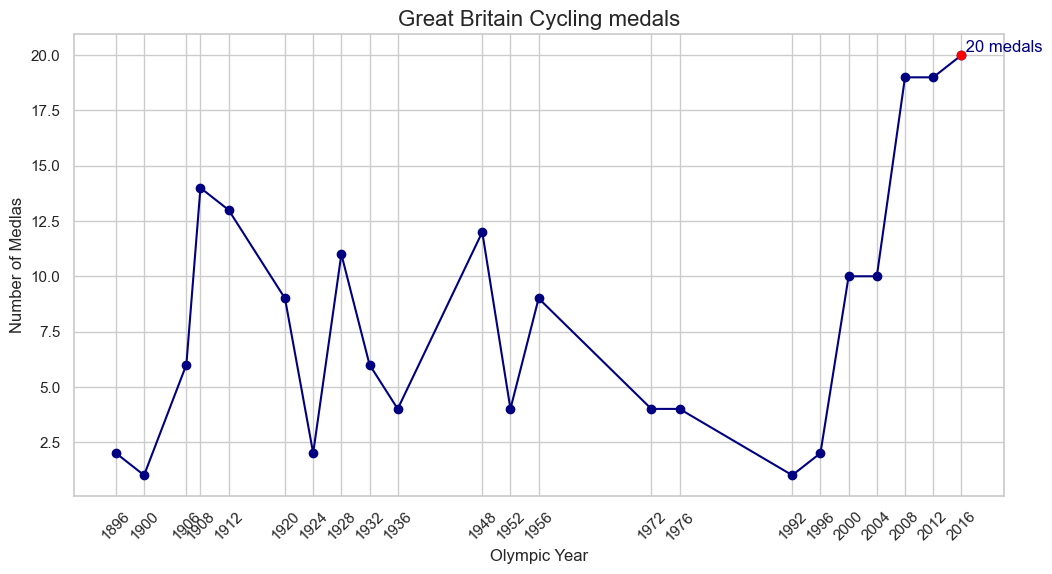

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=[12, 6])
plt.plot(medal_trend_cycling.index, medal_trend_cycling.values, marker='o', color='navy', linestyle='-')

peak_years = medal_trend_cycling[medal_trend_cycling == medal_trend_cycling.max()]
plt.scatter(peak_years.index, peak_years.values, color='red', zorder=5)

for year, medals in peak_years.items():
    plt.text(year, medals, f' {medals} medals', verticalalignment='bottom', horizontalalignment='left', color='navy')

plt.title('Great Britain Cycling medals', fontsize=16)
plt.xticks(medal_trend_cycling.index)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medlas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout

plt.show()